In [1]:
# Python Packages - GENERAL DEPENDENCIES
import numpy as np
import datetime as dt
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
#
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
#
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# Base.classes.keys() #['measurement', 'station']
# session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
#results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').all()

result_month6 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
#print(result_month6)

In [5]:
#  3. Convert the June temperatures to a list.
#
# For loop
#results_month6 = []

#for i,j in result_month6:
    # i = date YYYY-MM-DD
    # i = data
    #results_month6.append((i,j)) # For Tuple
    
# Simplified list    
results_month6 = list(result_month6)
#print(results_month6) #('2017-06-09', 80.0)


In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
#
df_6 = pd.DataFrame(results_month6, columns=['Date','Precipitation for all June']) # Create DF
df_6.set_index(df_6['Date'], inplace=True) # Set Index
df_6=df_6[['Precipitation for all June']]

df_6.head(5)

,Precipitation for all June
Date,
2010-06-01,78.0
2010-06-02,76.0
2010-06-03,78.0
2010-06-04,76.0
2010-06-05,77.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_6.describe()

,Precipitation for all June
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
result_month12 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
#print(result_month12)

In [9]:
# 7. Convert the December temperatures to a list.
#results_month12 = []

#for i,j in result_month6:
    # i = date YYYY-MM-DD
    # i = data
    #results_month12.append((i,j)) # For Tuple
    
# Simplified list    
results_month12 = list(result_month12)
#print(results_month12) #('2017-06-09', 80.0),,

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_12 = pd.DataFrame(results_month12, columns=['Date','Precipitation for all December (x = 12)']) # Create DF
df_12.set_index(df_12['Date'], inplace=True) # Set Index
df_12=df_12[['Precipitation for all December (x = 12)']]
df_12.head(5)

,Precipitation for all December (x = 12)
Date,
2010-12-01,76.0
2010-12-03,74.0
2010-12-04,74.0
2010-12-06,64.0
2010-12-07,64.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_12.describe()

,Precipitation for all December (x = 12)
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
##### Deliverable 3

<AxesSubplot:xlabel='date'>

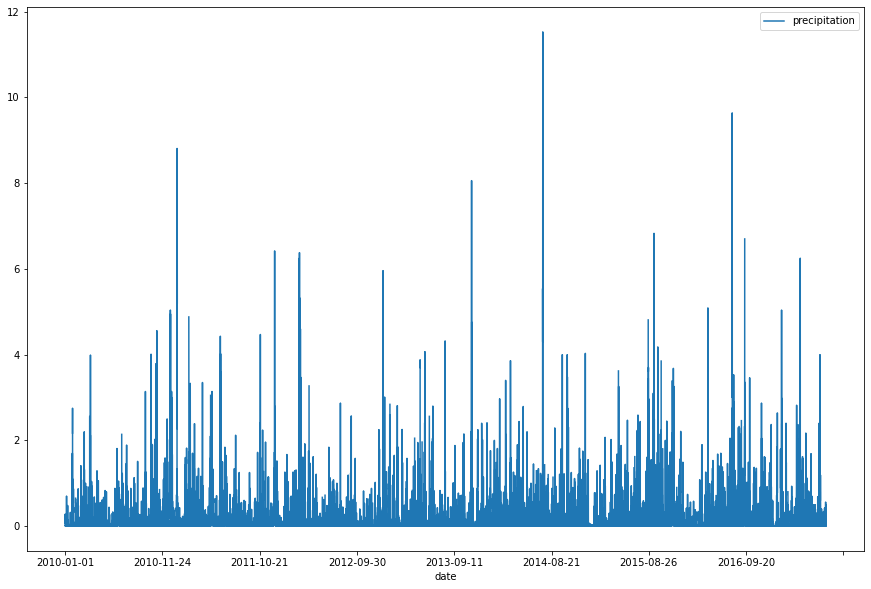

In [13]:
# See All the data
# 
# 
# # Perform a query to retrieve the data and precipitation scores
results = []

# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())

# Sort the dataframe by date
#results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date).all()
#print(results) #2016-08-23

# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(results, columns=['date','precipitation']) # Create DF
df.set_index(df['date'], inplace=True) # Set Index
#print(df.to_string(index=False)) # 2016-08-23           0.00
df = df.sort_index()
# print(df.to_string(index=False)) #  2016-08-23            0.00 AND 2016-08-23            NaN
df.plot(figsize=(15,10))
#df.plot()

<AxesSubplot:xlabel='date'>

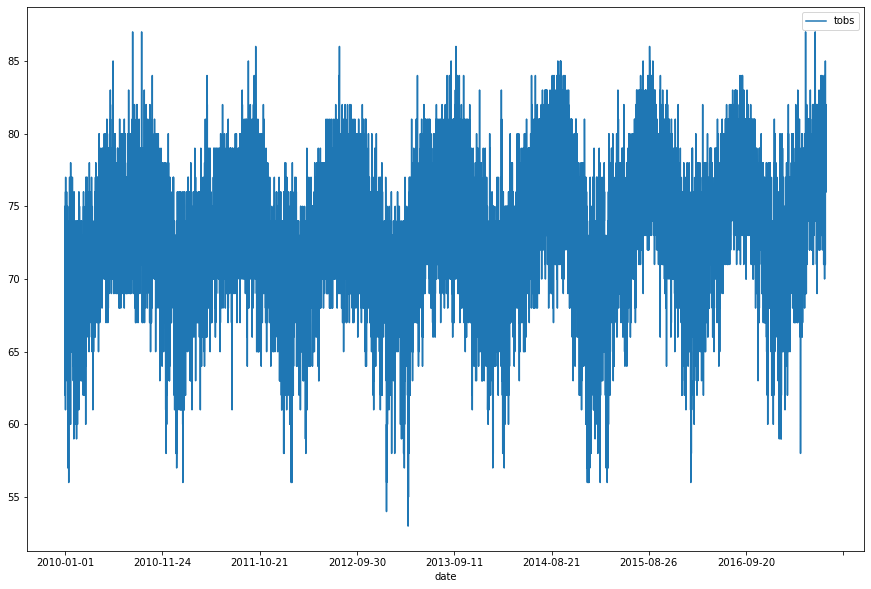

In [14]:
results = []

# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.tobs)
#print(results.all())

# Sort the dataframe by date
#results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date).all()
#print(results) #2016-08-23

# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(results, columns=['date','tobs']) # Create DF
df.set_index(df['date'], inplace=True) # Set Index
#print(df.to_string(index=False)) # 2016-08-23           0.00
df = df.sort_index()
# print(df.to_string(index=False)) #  2016-08-23            0.00 AND 2016-08-23            NaN
df.plot(figsize=(15,10))
#df.plot()

In [15]:
# Additional Query for June
# 
# 
# 
# 
station_6 = session.query(Measurement.station, Measurement.tobs).filter(extract('month', Measurement.date)==6).group_by(Measurement.station).all()
station_6_df = list(station_6)

query_1 = pd.DataFrame(station_6_df, columns=['Station','TOBS for all June']) # Create DF
#query_1.set_index(query_1['Station'], inplace=True) # Set Index
#query_1=query_1[['Precipitation for all June']]
query_1.head(5)

,Station,TOBS for all June
0,USC00511918,74.0
1,USC00513117,74.0
2,USC00514830,73.0
3,USC00516128,70.0
4,USC00517948,77.0


In [16]:
# Additional Query for December
# 
# 
# 
# 
station_12 = session.query(Measurement.station, Measurement.tobs).filter(extract('month', Measurement.date)==12).group_by(Measurement.station).all()
station_12_df = list(station_12)
#print(results_month6)

query_2 = pd.DataFrame(station_12_df, columns=['Station','TOBS for all December']) # Create DF
#query_2.set_index(query_2['Station'], inplace=True) # Set Index
#query_2=query_2[['Precipitation for all December']]
query_2.head(5)

,Station,TOBS for all December
0,USC00511918,70.0
1,USC00513117,73.0
2,USC00514830,73.0
3,USC00516128,71.0
4,USC00517948,72.0


In [19]:
# Additional Query for December
# 
# 
# 
# 
station_12_prep = session.query(Measurement.station, Measurement.prcp).filter(extract('month', Measurement.date)==12).group_by(Measurement.station).all()
station_12_prep_df = list(station_12_prep)
#print(results_month6)

query_3 = pd.DataFrame(station_12_prep_df, columns=['Station','Precipitation for all December']) # Create DF
#query_3.set_index(query_3['Station'], inplace=True) # Set Index
#query_3=query_3[['Precipitation for all June']]
query_3.head(5)

,Station,Precipitation for all December
0,USC00511918,0.13
1,USC00513117,0.76
2,USC00514830,0.03
3,USC00516128,1.48
4,USC00517948,0.70


In [20]:
# Additional Query for June
# 
# 
# 
# 
station_6_prep = session.query(Measurement.station, Measurement.prcp).filter(extract('month', Measurement.date)==6).group_by(Measurement.station).all()
station_6_prep_df = list(station_6_prep)

query_4 = pd.DataFrame(station_6_prep_df, columns=['Station','Precipitation for all June']) # Create DF
query_4.set_index(query_4['Station'], inplace=True) # Set Index
query_4=query_4[['Precipitation for all June']]
query_4.head(5)

,Precipitation for all June
Station,
USC00511918,0.00
USC00513117,0.03
USC00514830,0.01
USC00516128,0.08
USC00517948,0.00
